In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  

In [44]:
xls = pd.ExcelFile('../data/processed/graphicage_corrige.xls')
graphicage = [
    pd.read_excel(xls, 'L news horaires', header=None),
    pd.read_excel(xls, 'MJ news horaires', header=None),
    pd.read_excel(xls, 'Mer  news horaires', header=None),
    pd.read_excel(xls, 'MJ news horaires', header=None),
    pd.read_excel(xls, 'V news horaires', header=None),
]
graphicage_coords = [
    (7, 211, 2, 6),
    (7, 211, 2, 6),
    (7, 211, 0, 6),
    (7, 211, 2, 6),
    (7, 206, 2, 6),
]
for i in range(4):
    day = graphicage[i]
    start, stop, k, _ = graphicage_coords[i]
    day = day.iloc[start:stop, k:].reset_index(drop=True)
    day.columns = np.arange(day.shape[1])
    graphicage[i] = day

In [56]:
values = []
for i in range(4):
    day = graphicage[i]
    lines = np.flatnonzero(day.iloc[:, 0].notnull()) + 1
    n_lines = lines.shape[0]
    start_col = graphicage_coords[i][3]
    for k in range(n_lines):
        cols = day.iloc[lines[k], start_col:].dropna()
        for c in cols:
            try:
                n = int(c)
                values.append(n)
            except ValueError:
                continue
values = np.array(values)

In [57]:
values

array([55, 46, 46, 31, 37, 24,  3,  3, 37, 56,  7,  7, 56, 52, 53, 53, 33,
       46, 31, 43, 37, 37, 16, 46, 46,  5, 46, 46, 19, 55, 29, 16, 16, 24,
       60, 33, 60, 30, 15, 30, 20, 20, 30, 15, 30, 57, 38, 16, 16, 57, 60,
       37, 12, 60, 49, 33, 37, 49, 21, 14, 14, 14, 15, 17, 34, 19, 36, 24,
       15, 15, 33, 16, 24, 30, 39, 20, 38, 39, 46, 38, 45, 45, 20, 46, 21,
       10, 10, 21, 43, 25, 25, 43, 36, 24, 34, 32, 32, 27,  4, 26, 17, 34,
       21, 34,  6, 59, 17, 59, 47, 30, 30, 47, 24, 16, 16, 24,  6,  4, 21,
       29, 41,  5,  5, 45, 40, 26, 40, 31, 29, 31, 40,  5, 52, 26, 12,  4,
        4, 27, 55, 46, 46, 31, 37, 24,  3,  3, 37, 56,  7,  7, 56, 52, 53,
       53, 33, 46, 31, 43, 37, 37, 16, 46, 46,  5, 46, 46, 19, 55, 29, 16,
       24, 60, 33, 60, 30, 15, 30, 20, 20, 30, 15, 30, 57, 38, 16, 16, 57,
       60, 37, 12, 60, 49, 33, 37, 49, 17, 14, 14, 14, 15, 17, 34, 19, 36,
       24, 15, 15, 33, 16, 24, 30, 39, 20, 38, 39, 46, 38, 45, 45, 20, 46,
       21, 10, 10, 21, 43

/home/nicolas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/home/nicolas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


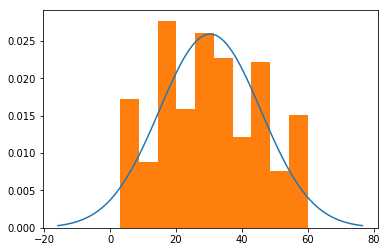

In [58]:
mu = np.mean(values)
variance = np.var(values)
sigma = np.sqrt(variance)
x_min, x_max = np.min(values) + 2, np.max(values) - 2
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma))
plt.hist(values, normed=True)
plt.show()

### mu = 30.349282296650717
### sigma = 15.392395809853596

In [101]:
def get_random_value(car_size=-1):
    x_max2 = min(x_max, car_size) if car_size != -1 else x_max
    x = -1.0
    while not x_min <= x <= x_max2:
        x = np.random.normal(mu, sigma)
    return int(x)

(array([2524., 2144., 3935., 3158., 5738., 4438., 7149., 5239., 8263.,
        5634., 8512., 5481., 7902., 4743., 6512., 3753., 4969., 2783.,
        3273., 1807., 2043.]),
 array([ 5.        ,  7.47619048,  9.95238095, 12.42857143, 14.9047619 ,
        17.38095238, 19.85714286, 22.33333333, 24.80952381, 27.28571429,
        29.76190476, 32.23809524, 34.71428571, 37.19047619, 39.66666667,
        42.14285714, 44.61904762, 47.0952381 , 49.57142857, 52.04761905,
        54.52380952, 57.        ]),
 <a list of 21 Patch objects>)

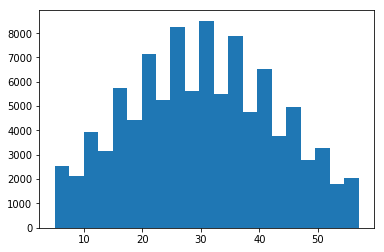

In [68]:
y = np.array([get_random_value() for _ in range(100000)])
plt.hist(y, bins=21)

In [86]:
segments = pd.read_csv('../data/raw/facteurc_segments.csv', sep=';').reset_index(drop=True)
segments['NB_PASSAGERS'] = -1
n_segments = segments.shape[0]
segments.head()
desired_segments_columns = segments.columns

In [87]:
services = pd.read_csv('../data/raw/facteurc_services_improved.csv', sep=';')
services.head()

SERVICE       CONDUCTEUR  \
0  BALIAN 01    BLEIN Jacques   
1  BALIAN 02  DUVAL Françoise   
2  BALIAN 03  MANCEL Isabelle   
3  BALIAN 04     CABELLO Eric   
4  BALIAN 05   BACHIR Patrice   

                                               DEPOT  DEPOT_LAT  DEPOT_LON  \
0  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...  47.720120   3.314400   
1  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...  47.720120   3.314400   
2             GRANDCHAMP (89) - DEPOT - RUE GAILLARD  47.805045   3.150271   
3  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...  47.720120   3.314400   
4  TOUCY (89) - DEPOT - 280 AVENUE DU GENERAL DE ...  47.720120   3.314400   

   VEHICULE_NUMPARC  VEHICULE_CAPACITE  
0               780                 33  
1               634                 33  
2               566                 47  
3                 8                 59  
4                 9                 57

In [88]:
services_to_capa = dict(zip(services['SERVICE'], services['VEHICULE_CAPACITE']))

In [89]:
segments['CAPA_LUNDI'] = segments['LUNDI'].apply(lambda service: services_to_capa[service] if not pd.isnull(service) else -1)
segments['CAPA_MARDI'] = segments['MARDI'].apply(lambda service: services_to_capa[service] if not pd.isnull(service) else -1)
segments['CAPA_MERCREDI'] = segments['MERCREDI'].apply(lambda service: services_to_capa[service] if not pd.isnull(service) else -1)
segments['CAPA_JEUDI'] = segments['JEUDI'].apply(lambda service: services_to_capa[service] if not pd.isnull(service) else -1)
segments['CAPA_VENDREDI'] = segments['VENDREDI'].apply(lambda service: services_to_capa[service] if not pd.isnull(service) else -1)

In [97]:
segments['CAPA_max'] = segments[['CAPA_LUNDI', 'CAPA_MARDI', 'CAPA_MERCREDI', 'CAPA_JEUDI', 'CAPA_VENDREDI']].max(axis=1)

In [99]:
n_segments

208

In [102]:
for i in range(n_segments):
    n = get_random_value(segments.at[i, 'CAPA_max'])
    segments.at[i, 'NB_PASSAGERS'] = n + np.random.randint(-2, 3)

In [103]:
segments['DEPART_HEURE'] = segments.loc[:, 'DEPART_HEURE'].apply(lambda x: ':'.join(x.split(' ')[1].split(':')[:2]))
segments['FIN_HEURE'] = segments.loc[:, 'FIN_HEURE'].apply(lambda x: ':'.join(x.split(' ')[1].split(':')[:2]))

In [104]:
segments[desired_segments_columns].head()

ETABLISSEMENT    SEGMENT DEPART_HEURE                         DEPART_LIEU  \
0     TR BALIAN   89-050-A        07:20               CHARMOY (89) - MAIRIE   
1     TR BALIAN  89-STJ2-A        07:10                         ARMEAU (89)   
2     TR BALIAN   89-246-A        07:10            EGLENY (89) - CHAUCHOINE   
3     TR BALIAN   89-025-R        17:53  ARMEAU (89) - 1 PLACE DE LA MAIRIE   
4     TR BALIAN   89-025-C        13:03  ARMEAU (89) - 1 PLACE DE LA MAIRIE   

  FIN_HEURE                                           FIN_LIEU      LUNDI  \
0     07:45            MIGENNES (89) - COLLEGE JACQUES PREVERT  JOIGNY 16   
1     07:55  JOIGNY (89) - COLLEGE SAINT JACQUES - 6 FBG ST...  JOIGNY 09   
2     08:00           TOUCY (89) - LYCEE - 6 RUE DES MONTAGNES  BALIAN 04   
3     18:23                    LES BORDES (89) - LE CLOS AUBRY  JOIGNY 09   
4     13:33                    LES BORDES (89) - LE CLOS AUBRY        NaN   

       MARDI   MERCREDI      JEUDI   VENDREDI DEPART_LATITUDE  \
0  JOIGNY 16  JOIGNY 16  JOIGNY 16  JOIGNY 16       47,941524   
1  JOIGNY 09  JOIGNY 09  JOIGNY 09  JOIGNY 09         48,0467   
2  BALIAN 04  BALIAN 04  BALIAN 04  BALIAN 04   47,8137588195   
3  JOIGNY 09        NaN  JOIGNY 09  JOIGNY 09        48,04467   
4        NaN  JOIGNY 09        NaN        NaN        48,04467   

   DEPART_LONGITUDE      FIN_LATITUDE     FIN_LONGITUDE  NB_PASSAGERS  
0  3,49103076923077          47,96925          3,504756            28  
1          3,319537  47,9833725495832  3,38901416931152            17  
2       3,387198746          47,73839  3,29567416931152            30  
3          3,322392         48,100829          3,406252            22  
4          3,322392         48,100829          3,406252            19

In [105]:
segments[desired_segments_columns].to_csv('../data/processed/segments_random.csv', sep=';', index=None)